<a href="https://colab.research.google.com/github/yeonjunky/learn_ml/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
class Perceptron:
  """
  퍼셉트론 분류기

  args: 
    eta: float
      학습률(0.0 ~ 1.0)
    n_iter: int
      훈련 데이터셋 반복 횟수
    random_state: int
      가중치 무작위 초기화를 위한 난수 생성기 시드

  w_: 1d-array
  errors_: list
    에포크마다 누적된 분류 오류 
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, x, y):
    """
      x: array-like, shape = [n_samples, n_features]
      y: array-like, shape = [n_samples]

      return self: object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])

    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(x, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    
    return self

  def net_input(self, x):
    """최종 입력 계산"""
    return np.dot(x, self.w_[1:]) + self.w_[0]

  def predict(self, x):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
    return np.where(self.net_input(x) >= 0.0, 1, -1)

In [7]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
print(np.arccos(v1.dot(v2) / np.linalg.norm(v1) * np.linalg.norm(v2)))

nan


<ipython-input-7-a26b06b36353>:3: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(v1.dot(v2) / np.linalg.norm(v1) * np.linalg.norm(v2)))


In [9]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


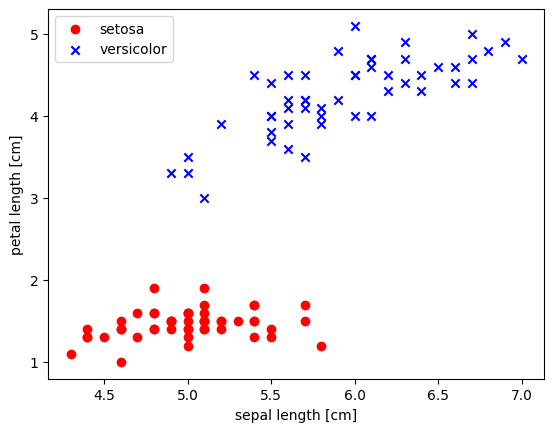

In [12]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

x = df.iloc[0:100, [0, 2]].values

plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

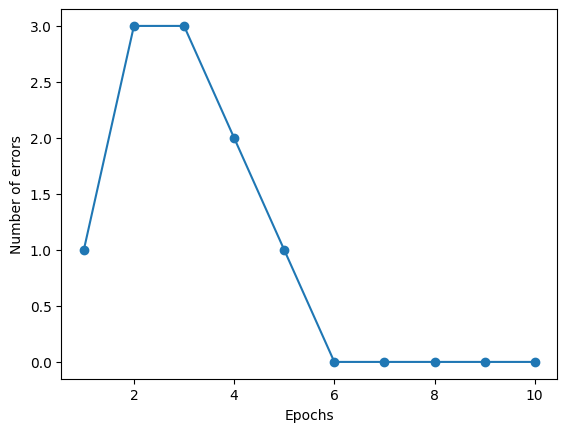

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(x, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [17]:
def plot_decision_regions(x, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

<ipython-input-17-cd0c5fe23765>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


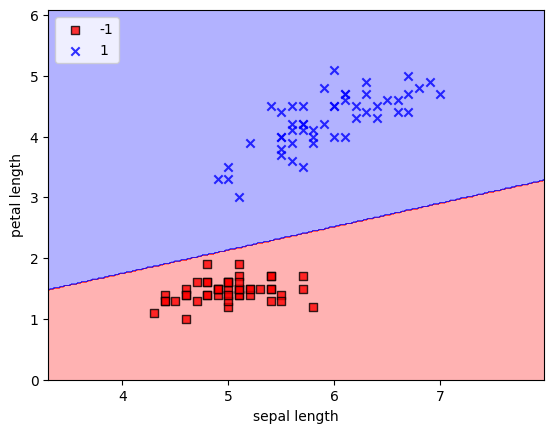

In [18]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()